# Classification with Logistic Regression For Diabetes Database Analysis (Link to the dataset: https://www.kaggle.com/code/lbronchal/pima-indians-diabetes-database-analysis/data)



# Regression Analysis
## Assignment Overview
In this part we will implement Logistic Regression [From Scratch] to build a Classifier on your selected dataset.


# Logistic Regression

## Learning Outcomes
Learning outcomes can be following but not limited to:
1. Use Pandas as the primary tool to process structured data in Python with CSV files,
2. Use matplotlib and seaborn library to produce various plots for visualization,
3. Train a machine learning model and use it to make a prediction from scratch.


## A. Drive Mounting


In [ ]:
#Connecting the google drive to access the stored image file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Data Understanding

In [ ]:
#Necessary Inputs
#Importing numpy to use array, lists related operations in an easy-use way
import numpy as np
#Importing statsmodels.api library to perform the linear regression.
import statsmodels.api as sm
#Importing matplotlib.pyplot i.e. collection of command style functions that make matplotlib work
import matplotlib.pyplot as plt
#Importing Seaborn a Python data visualization library built on top of Matplotlib
import seaborn as sns
#Importing pandas an open source data analysis library built on top of the Python programming language
import pandas as pd

## 1. Data Understanding, Cleaning and Transformation [2]
Understand what is data about and why do you think the data was collected, and what research questions data can answers.

(a) You can explain your logic in the text cell of your notebook.

(b) Based on your research questions Identify Dependent and Independent Variables. 2

(c) Use pandas to load your dataset and observe the data.
If required perform basic data cleaning and Transformation the way you fits your task requirements.


In [ ]:
#Creating a variable named data and providing path to .csv file for advertising data
regression = "/content/drive/MyDrive/AI/Diabeties.csv"

## 1.1 Data Understanding

Information about the dataset: The Pima Indian Diabetes dataset is a widely used dataset for scientific study, particularly in the area of diabetes. It details 768 women of Pima Indian ancestry's medical background and numerous health metrics. The following details are available in the database:


Pregnancies: The total number of pregnancies for the woman

In an oral glucose tolerance test, the plasma glucose concentration at two hours is glucose.

blood pressure, or diastolic blood pressure (mm Hg)

Triceps skin fold thickness: Skin Thickness (mm)

2-hour serum insulin concentration (mu U/ml)

BMI stands for body mass index (weight in kg/(height in m)2)

A feature to assess the genetic risk of diabetes in the family is the diabetes pedigree function.

Age: The woman's age (years)

Outcome: Class variable (0 or 1) indicating whether the patient has diabetes (1) or not (0)

In [ ]:
#Reading the dataset while storing it into a new variable and printing the dataset
dataset = pd.read_csv(regression)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#checking the datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking datatype
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#Checking for the unique values in the column Outcome
dataset['Outcome'].unique()
#In the result , 1 = True , 0 = False

array([1, 0])

In [ ]:
#Checking the rows and columns of the dataset
print("Rows:{}\nColumns:{}".format(dataset.shape[0], dataset.shape[1]))

Rows:768
Columns:9


In [ ]:
#Checking measures of all continuous data
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Since the dataset comprises of all numerical values, there are no unique elements
#Performing stistical calculations to find out the sum, mean , median, standard deviation , maximum and minimum of the dataset
#Initiating a for..loop to access the values inside the columns
for i in dataset:
  if i in ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]:
    print(i)
    print('Sum of',i,'=',dataset[i].sum())
    print('Mean of',i,'=',dataset[i].mean())
    print('Median of',i,'=',dataset[i].median())
    print('Standard Deviation of',i,'=',dataset[i].std())
    print('Maximum of',i,'=',dataset[i].max())
    print('Minimum of',i,'=',dataset[i].min())
    print("\n")

Pregnancies
Sum of Pregnancies = 2953
Mean of Pregnancies = 3.8450520833333335
Median of Pregnancies = 3.0
Standard Deviation of Pregnancies = 3.3695780626988694
Maximum of Pregnancies = 17
Minimum of Pregnancies = 0


Glucose
Sum of Glucose = 92847
Mean of Glucose = 120.89453125
Median of Glucose = 117.0
Standard Deviation of Glucose = 31.97261819513622
Maximum of Glucose = 199
Minimum of Glucose = 0


BloodPressure
Sum of BloodPressure = 53073
Mean of BloodPressure = 69.10546875
Median of BloodPressure = 72.0
Standard Deviation of BloodPressure = 19.355807170644777
Maximum of BloodPressure = 122
Minimum of BloodPressure = 0


SkinThickness
Sum of SkinThickness = 15772
Mean of SkinThickness = 20.536458333333332
Median of SkinThickness = 23.0
Standard Deviation of SkinThickness = 15.952217567727637
Maximum of SkinThickness = 99
Minimum of SkinThickness = 0


Insulin
Sum of Insulin = 61286
Mean of Insulin = 79.79947916666667
Median of Insulin = 30.5
Standard Deviation of Insulin = 115.2

## 1.2. Data Cleaning

In [ ]:
#Checking for the null values for further processes
dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


As we can see, there are no null values. We further calculate the sum of all boolean values for double checking.

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

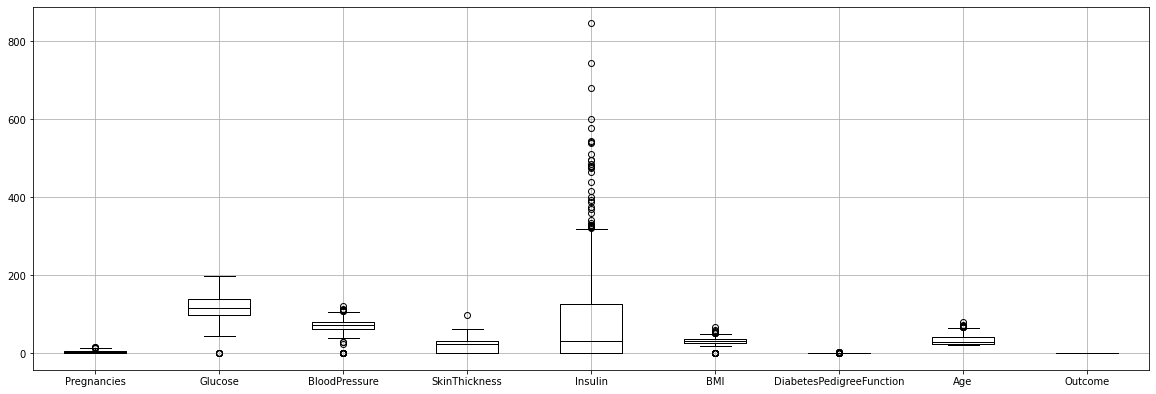

In [ ]:
#Checking for any outliers in the dataset
dataset.iloc[:,:].boxplot(figsize=[20,8], color='black')
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
#There are outliers, so we need to remove them.
#Importing scipy.stats library and using zscore funtion
import scipy.stats as stats
from scipy.stats import zscore
remove= np.abs(zscore(dataset))
print(np.where(remove < 3))

(array([  0,   0,   0, ..., 767, 767, 767]), array([0, 1, 2, ..., 6, 7, 8]))


In [ ]:
#New dataset has the following rows and columns:
cleanData = dataset[(remove<3).all(axis=1)]
cleanData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


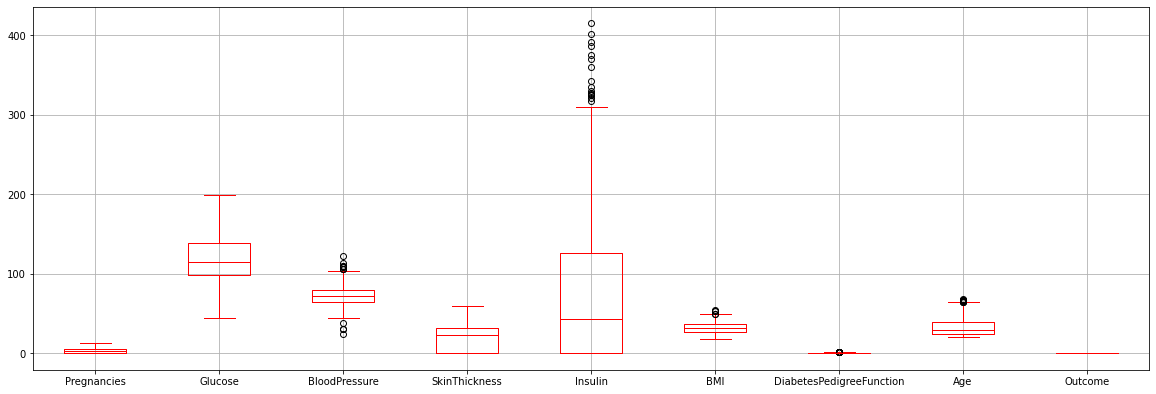

In [ ]:
#checking for outliers
cleanData.iloc[:,:].boxplot(figsize=[20,8], color='red')
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
#Dropping column  which is difficult to read
dataset = dataset.drop(["Insulin","DiabetesPedigreeFunction","BMI"],axis=1)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Age,Outcome
0,6,148,72,35,50,1
1,1,85,66,29,31,0
2,8,183,64,0,32,1
3,1,89,66,23,21,0
4,0,137,40,35,33,1
...,...,...,...,...,...,...
763,10,101,76,48,63,0
764,2,122,70,27,27,0
765,5,121,72,23,30,0
766,1,126,60,0,47,1


## 1.3. Identify Dependent and Independent Variables

In [ ]:
#calculate the pairwise correlation between columns of a Pandas DataFrame.
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,-0.113970,0.074752
Age,0.544341,0.263514,0.239528,-0.113970,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.238356,1.000000


The function returns a correlation matrix, which is a table showing the correlation coefficients between all pairs of columns in the DataFrame. The correlation coefficient is a measure of the strength and direction of the relationship between two variables.

##Separation of the independent and dependent variables from the dataset.

In [ ]:
#First, for independent variable:
X = dataset.iloc[:,0:-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Age
0,6,148,72,35,50
1,1,85,66,29,31
2,8,183,64,0,32
3,1,89,66,23,21
4,0,137,40,35,33


In [ ]:
#For dependent variable.
Y = dataset.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
#Conversion to numpy array
X_new = X.to_numpy()
Y_new = dataset['Outcome'].to_numpy()

#Calculating mean
mean_X = np.mean(X_new)
mean_Y = np.mean(Y_new)
print("X:",mean_X,"Y:",mean_Y)

X: 49.524479166666666 Y: 0.3489583333333333


## 2. Data Analysis and Visualization [2.5]
Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make various plots to generate insights from dataset.
To generate better insights from the data make visualization and plot of your Independent variable against Dependent variable.

In [ ]:
#Importing a visualization library
import plotly.express as px

In [ ]:
#Counting the number of women having diabetes
outcome = dataset[dataset['Outcome']==1]
no_outcome = dataset[dataset['Outcome']==0]

print("Total =",len(dataset))
print("Number of women having diabetes =", len(outcome))
outcome_per = 1.*len(outcome)/len(dataset)*100.0
print("Percentage having diabetes =", f'{outcome_per:.2f}', "%")
print("Not having diabetes =", len(no_outcome))
NonSurvivor_Per = 1.*len(no_outcome)/len(dataset)*100.0
print("Percentage of not having diabetes =", f'{NonSurvivor_Per:.2f}', "%")

Total = 768
Number of women having diabetes = 268
Percentage having diabetes = 34.90 %
Not having diabetes = 500
Percentage of not having diabetes = 65.10 %


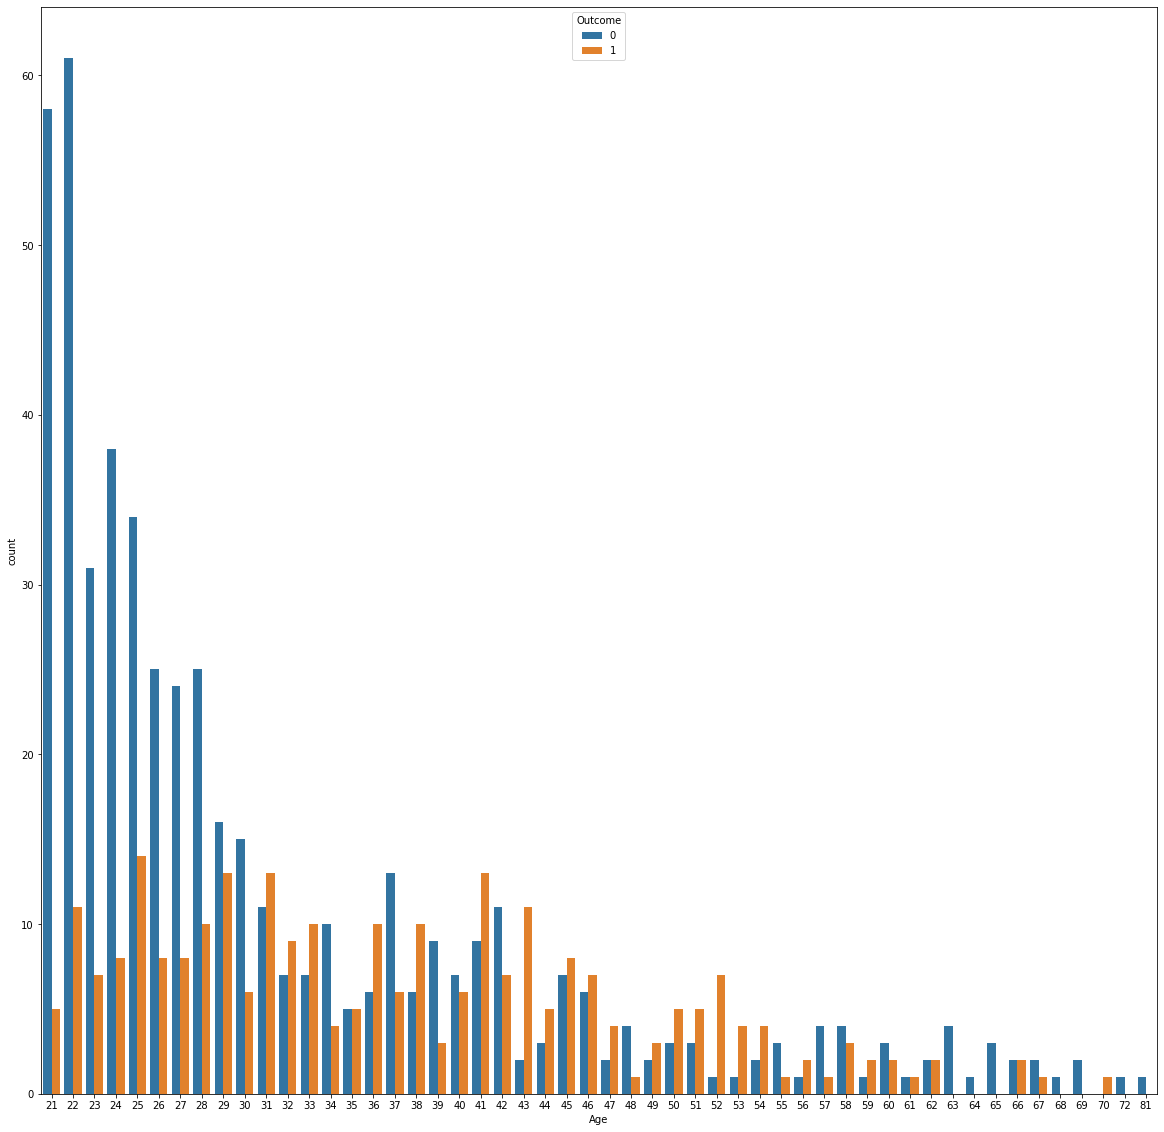

In [ ]:
# Bar Chart to indicate the number of women having diabetes based on their gender
plt.figure(figsize=[20,20])
sns.countplot(x = 'Age', hue = 'Outcome', data=dataset)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



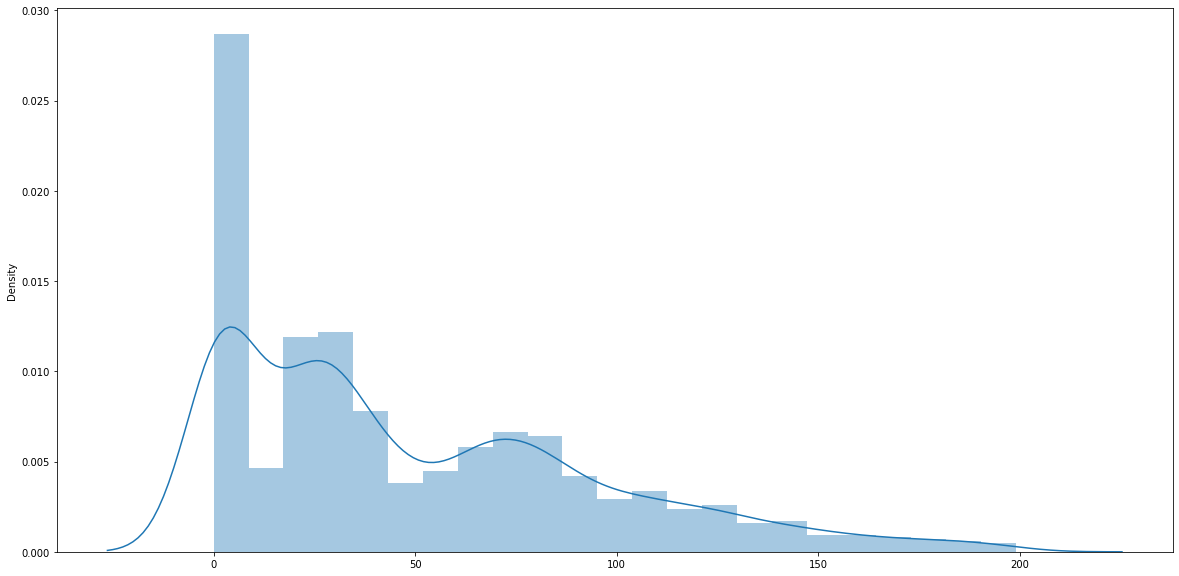

In [ ]:
#Visualizing Independent Data in a distplot
sns.distplot(X)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



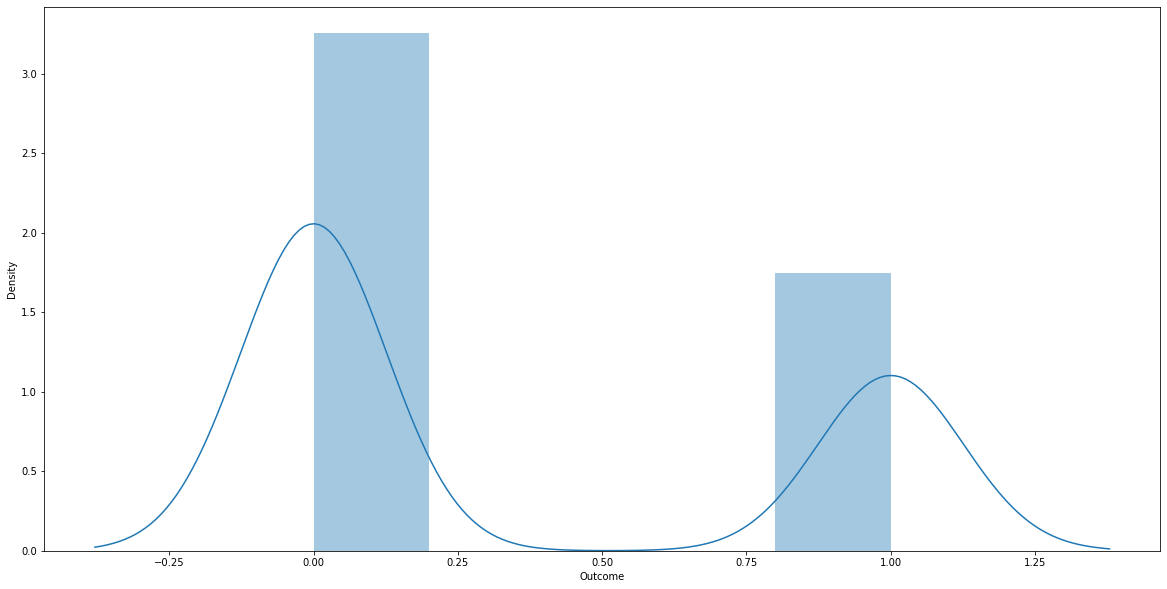

In [ ]:
#Visualizing Dependent Data in a distplot
sns.distplot(Y)

In [ ]:
#Scatter matrix of all the dataset
sc_plot = px.scatter_matrix(X)
sc_plot.show()

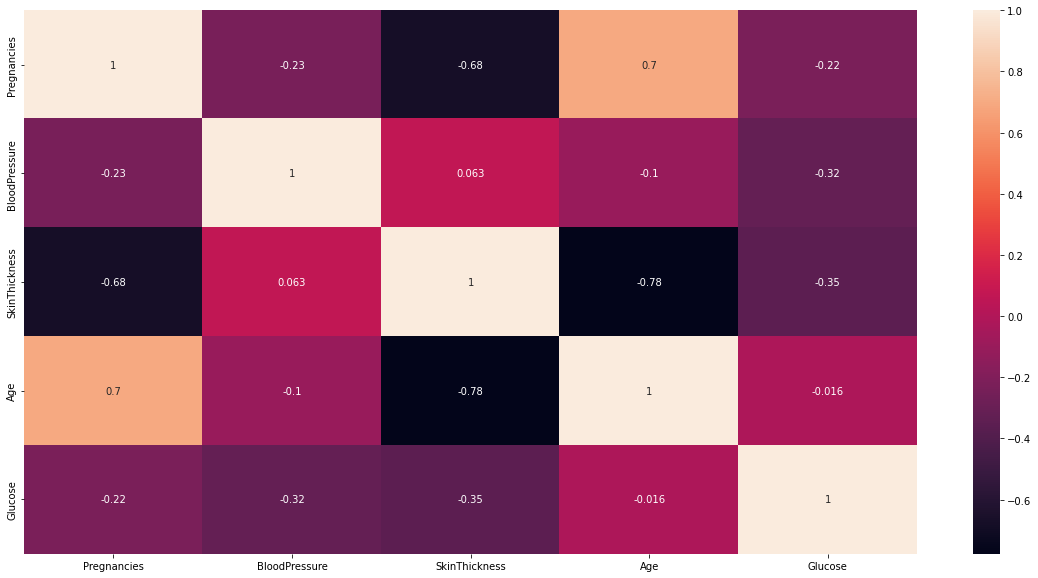

In [ ]:
#Correlation of the variables in an heatmap
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(dataset.corr()[["Pregnancies", "BloodPressure", "SkinThickness","Age","Glucose"]].corr(), annot=True,color="red")
plt.show()

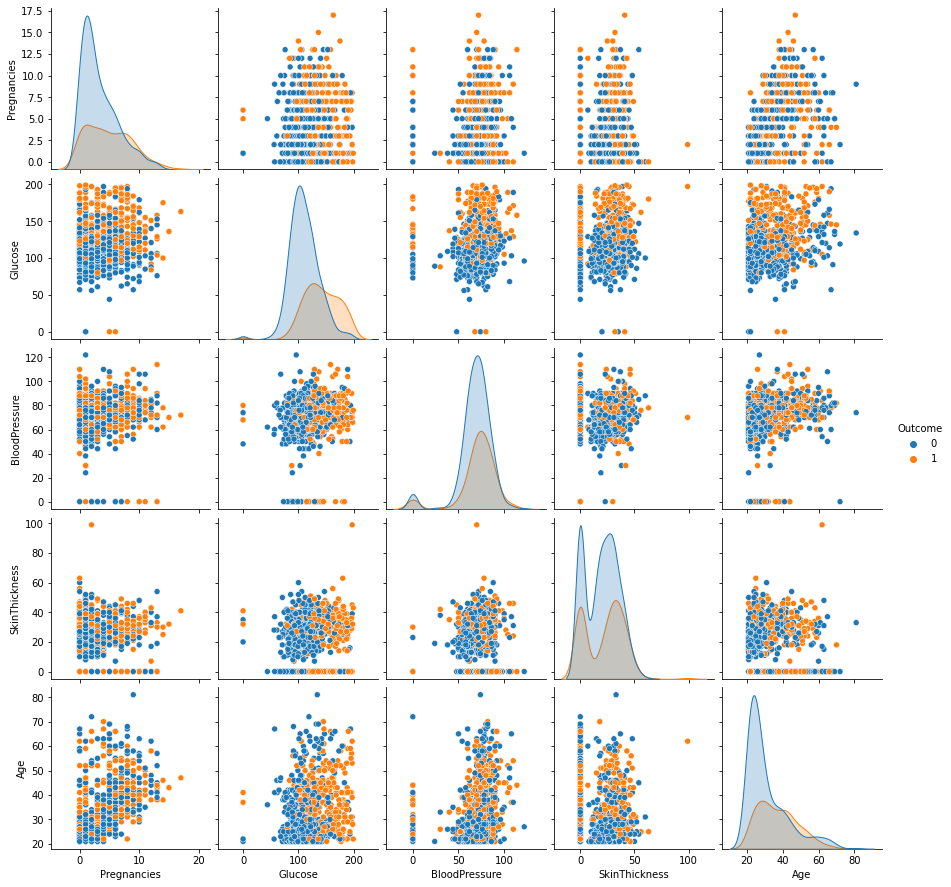

In [ ]:
#Visualizing data in pairplot
plt.rcParams["figure.figsize"] = (20,10)
sns.pairplot(dataset,hue='Outcome')

In [ ]:
#Viewing the data in three co-ordinates between Age , Skinthickness, Insuling against Glucose

dimension= px.scatter_3d(dataset, x="Age",y="SkinThickness",z="Pregnancies",color="Outcome",color_discrete_map = {"Age": "pink", "SkinThickness": "green", "Coderre":"red"})
dimension.show()

## 3. Build Primary Model[Logistic Regression] and 4 Model Evaluation[1]:
Once you have cleaned, transformed and Visualize your data build Logistic Regression Model from Scratch.**bold text**

In [ ]:
#importing sklearn.model
from sklearn.model_selection import train_test_split

In [ ]:
#Training datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train.values, y_train.values)

LogisticRegression(random_state=0)

In [ ]:
#Model Testing
y_predict = classifier.predict(X_test)
y_predict

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
#Prediction of the values by the trained module
X = classifier.predict([[6,148,72,35,50]])
if X == [1]:
    print("Module predicts that the women will have diabetes")
else:
    print("Module predicts that the women will not have diabetes")

Module predicts that the women will have diabetes


In [ ]:
#The confusion_matrix function from the sklearn.metrics module of the scikit-learn library is used to evaluate the performance of the logistic regression classifier

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[82 13]
 [40 19]]


The confusion_matrix is a function that takes in the true labels y_test and the predicted labels y_predict and returns a confusion matrix. A confusion matrix is a table that summarizes the performance of a classifier by showing the number of true positive, true negative, false positive, and false negative predictions made by the classifier. The rows of the confusion matrix represent the actual class labels, while the columns represent the predicted class labels.

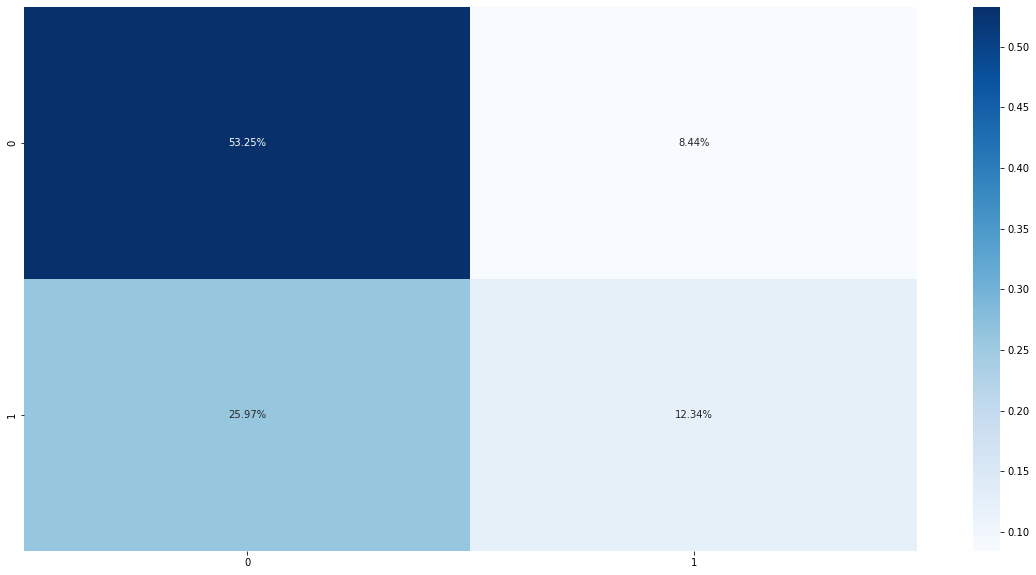

In [ ]:
#Printing heatmap
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')
plt.show()

In [ ]:
#Prediction Report
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_predict))
print("Accuracy:",accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76        95
           1       0.59      0.32      0.42        59

    accuracy                           0.66       154
   macro avg       0.63      0.59      0.59       154
weighted avg       0.64      0.66      0.63       154

Accuracy: 0.6558441558441559


In addition to the confusion matrix, the code also calculates the accuracy of the classifier using the accuracy_score function, which takes in the true labels and predicted labels and returns a scalar value representing the accuracy of the classifier. The accuracy is the proportion of correct predictions made by the classifier and is a commonly used metric for evaluating the performance of classifiers.

In [ ]:
# Importing precision_score and recall_score from scikit-learn's metrics module

from sklearn.metrics import precision_score, recall_score

# Printing the precision score of the classifier

print("Precision:", precision_score(y_test, y_predict))


# Printing the recall score of the classifier

print("Recall:", recall_score(y_test, y_predict))

Precision: 0.59375
Recall: 0.3220338983050847


Precision is the fraction of positive predictions that are correct.Recall is the fraction of positive instances that are correctly identified.A high precision score indicates that the classifier is good at avoiding false positive predictions, while a high recall score indicates that the classifier is good at detecting true positive predictions.






### 5. AUC-ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



Train/Test split results:


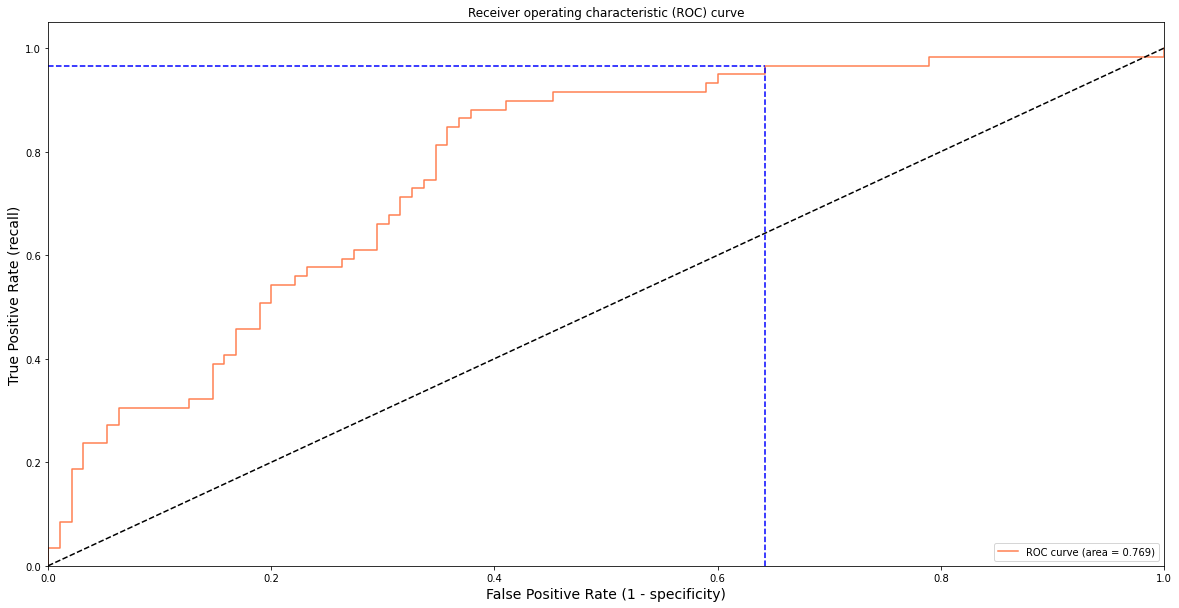

In [ ]:
#plotting a Receiver Operating Characteristic (ROC) curve for a classifier, using the roc_curve function from the sklearn.metrics library.

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

#Probability of the positive class for the test data
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

#False positive rate (fpr), true positive rate (tpr)

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

#The x-axis and y-axis limits are set to [0.0, 1.0] and [0.0, 1.05] respectively
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
#legend is set to appear in the lower right of the plot.
plt.legend(loc="lower right")
#Displaying plot using .show.
plt.show()

The area under the curve (AUC) is calculated using the auc function and added to the plot as a label. A line of y = x (k--) is also plotted, representing a random classifier. The index of the first threshold for which the sensitivity (tpr) is greater than 0.95 is found using np.where and np.min functions, and a line is plotted from (0, tpr[idx]) to (fpr[idx], tpr[idx]). The x-axis and y-axis limits are set to [0.0, 1.0] and [0.0, 1.05] respectively, and labels and title are added to the plot.

##5. Dimensionality Reduction[6]:

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea-
tures,evaluate the model and Compare the output with the evaluation from step 4.

In [ ]:
# Importing pre-implemented LogisticRegression algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Initializing the model with total iteration of 10000
logreg = LogisticRegression(max_iter=10000)

# Fiting data to the model
logreg.fit(X_train, y_train)

# Predict data from trained model
y_pred_test = logreg.predict(X_test)

# Checking accuracy
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 65.58%


In [ ]:
from sklearn.decomposition import PCA

#Transforming data using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# fit logistic regression model on PCA-transformed data
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# Evaluating performance on testing set
score_pca = logreg_pca.score(X_test_pca, y_test)
score = logreg.score(X_test, y_test)

print("Accuracy without PCA: {:.2f}%".format(score * 100))
print("Accuracy with PCA: {:.2f}%".format(score_pca * 100))

Accuracy without PCA: 65.58%
Accuracy with PCA: 70.13%


In [ ]:
#Applying PCA to X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_pca)

#Reconstructing original data from principal components
X_reconstructed = pca.inverse_transform(X_pca)

# Printing first 5 rows of reconstructed data
print(X_reconstructed[:5])

[[-41.30618655  -9.7876349 ]
 [ 45.82985457  57.62060047]
 [-13.23428735   7.22529801]
 [ 18.80443205  69.73195014]
 [ 18.55997573  -2.66589398]]


In [ ]:
X_reconstructed.shape

(614, 2)

## 6. Conclusion [1]
Conclude the result of the comparison.

In [ ]:
# Comparing the evaluation from step 4
if score > score_pca:
    print("The model with Logostic Regression performed better.")
else:
  print("The model both with PCA and Logistic Regression performed better.")

The model both with PCA and Logistic Regression performed better.


Based on the results presented, it seems that the logistic regression model with PCA performed better than the logistic regression model without PCA, with an accuracy increase of 4.55%. This suggests that PCA was able to improve the performance of the logistic regression model.In conclusion, the use of PCA in combination with logistic regression has resulted in improved performance.